#1. Ingestão de Dados
####-Carregar o dataset CSV em um Delta Table no Databricks.
####-Garantir que os tipos de dados estão corretos (date, float, string, int).


In [0]:
df_raw = spark.table("default.transacoes_clientes")
display(df_raw.limit(10))
df_raw.printSchema()


id_cliente,valor_transacao,data_transacao,categoria,inadimplente
209,57.21,2024-07-01,mercado,0
285,19.8,2024-06-15,lazer,0
169,19.54,2025-01-04,educacao,0
266,49.68,2025-07-28,mercado,0
8,9.86,2024-12-07,mercado,0
5,54.54,2025-02-13,compras_online,0
48,17.08,2024-09-28,lazer,1
100,159.16,2024-01-12,transporte,0
164,37.41,2024-07-10,null,1
197,47.0,2024-03-21,restaurante,0


root
 |-- id_cliente: long (nullable = true)
 |-- valor_transacao: double (nullable = true)
 |-- data_transacao: date (nullable = true)
 |-- categoria: string (nullable = true)
 |-- inadimplente: long (nullable = true)



In [0]:
df_raw = spark.table("default.transacoes_clientes")
df_raw.printSchema()


root
 |-- id_cliente: long (nullable = true)
 |-- valor_transacao: double (nullable = true)
 |-- data_transacao: date (nullable = true)
 |-- categoria: string (nullable = true)
 |-- inadimplente: long (nullable = true)



In [0]:
from pyspark.sql.functions import col

df_typed = (
    df_raw
    .withColumn("id_cliente", col("id_cliente").cast("int"))
    .withColumn("valor_transacao", col("valor_transacao").cast("float"))
    .withColumn("data_transacao", col("data_transacao").cast("date"))
    .withColumn("categoria", col("categoria").cast("string"))
    .withColumn("inadimplente", col("inadimplente").cast("int"))
)

df_typed.printSchema()


root
 |-- id_cliente: integer (nullable = true)
 |-- valor_transacao: float (nullable = true)
 |-- data_transacao: date (nullable = true)
 |-- categoria: string (nullable = true)
 |-- inadimplente: integer (nullable = true)



In [0]:
(df_typed.write
    .format("delta")
    .mode("overwrite")
    .option("overwriteSchema", "true")
    .saveAsTable("default.transacoes_clientes")
)

df_typed.printSchema()


root
 |-- id_cliente: integer (nullable = true)
 |-- valor_transacao: float (nullable = true)
 |-- data_transacao: date (nullable = true)
 |-- categoria: string (nullable = true)
 |-- inadimplente: integer (nullable = true)



#2. Qualidade e Transformação
####-Tratar valores ausentes em categoria e valor_transacao.
####-Remover duplicatas.
####-Criar colunas derivadas, como:
#####Média de gasto mensal por cliente
#####Número de transações por cliente


In [0]:
df_no_nulls = df_typed.fillna({
    "valor_transacao": 0.0,   
    "categoria": "desconhecida" 
})

display(df_no_nulls.limit(100))

id_cliente,valor_transacao,data_transacao,categoria,inadimplente
209,57.21,2024-07-01,mercado,0
285,19.8,2024-06-15,lazer,0
169,19.54,2025-01-04,educacao,0
266,49.68,2025-07-28,mercado,0
8,9.86,2024-12-07,mercado,0
5,54.54,2025-02-13,compras_online,0
48,17.08,2024-09-28,lazer,1
100,159.16,2024-01-12,transporte,0
164,37.41,2024-07-10,desconhecida,1
197,47.0,2024-03-21,restaurante,0


In [0]:
(df_no_nulls.write
    .format("delta")
    .mode("overwrite")
    .saveAsTable("default.transacoes_clientes")
)

display(df_no_nulls.limit(100))

id_cliente,valor_transacao,data_transacao,categoria,inadimplente
209,57.21,2024-07-01,mercado,0
285,19.8,2024-06-15,lazer,0
169,19.54,2025-01-04,educacao,0
266,49.68,2025-07-28,mercado,0
8,9.86,2024-12-07,mercado,0
5,54.54,2025-02-13,compras_online,0
48,17.08,2024-09-28,lazer,1
100,159.16,2024-01-12,transporte,0
164,37.41,2024-07-10,desconhecida,1
197,47.0,2024-03-21,restaurante,0


In [0]:
df_no_dupes = df_no_nulls.dropDuplicates()

from pyspark.sql.functions import count

df_no_dupes.groupBy("id_cliente", "data_transacao", "valor_transacao", "categoria") \
    .agg(count("*").alias("qtd")) \
    .filter("qtd > 1") \
    .show()

+----------+--------------+---------------+---------+---+
|id_cliente|data_transacao|valor_transacao|categoria|qtd|
+----------+--------------+---------------+---------+---+
+----------+--------------+---------------+---------+---+



In [0]:
from pyspark.sql.functions import count

# Agrupa e conta
df_num_transacoes = df_no_dupes.groupBy("id_cliente") \
                               .agg(count("*").alias("num_transacoes"))

df_num_transacoes.show(100)


+----------+--------------+
|id_cliente|num_transacoes|
+----------+--------------+
|        94|             4|
|        29|             2|
|       284|             6|
|        88|             4|
|       108|             7|
|       131|             3|
|       148|             7|
|       279|             5|
|       190|             4|
|       195|             3|
|        56|             3|
|       172|             2|
|        24|             6|
|       186|             6|
|       275|             7|
|        99|             5|
|        39|             6|
|       102|             8|
|       142|             5|
|       136|             4|
|        38|             6|
|       241|             6|
|       249|             3|
|       209|             4|
|       120|             5|
|        15|             2|
|        20|             6|
|       118|             8|
|       225|             5|
|       121|             4|
|       229|             3|
|       109|            10|
|       133|        

In [0]:
# Adiciona a coluna num_transacoes
df_with_num_transacoes = df_no_dupes.join(df_num_transacoes, on="id_cliente", how="left")

df_with_num_transacoes.show(100)


+----------+---------------+--------------+--------------+------------+--------------+
|id_cliente|valor_transacao|data_transacao|     categoria|inadimplente|num_transacoes|
+----------+---------------+--------------+--------------+------------+--------------+
|       112|          11.16|    2024-10-29|       mercado|           0|             5|
|       283|          27.66|    2024-02-08|   restaurante|           0|             9|
|       106|          27.22|    2024-09-21|       mercado|           0|             4|
|       290|          86.69|    2024-05-20|         lazer|           0|             8|
|        90|           7.67|    2024-02-28|compras_online|           0|             8|
|       154|          21.45|    2024-06-13|       mercado|           0|            13|
|        28|          22.37|    2024-01-10|       mercado|           0|             7|
|        47|          23.79|    2024-11-25|       mercado|           0|            11|
|       107|          19.08|    2025-01-24|

In [0]:
from pyspark.sql.functions import year, month, concat_ws

# Criar coluna ano_mes como "YYYY-MM"
df_with_ano_mes = df_with_num_transacoes.withColumn(
    "ano_mes",
    concat_ws("-", year("data_transacao"), month("data_transacao"))
)

df_with_ano_mes.show(100)


+----------+---------------+--------------+--------------+------------+--------------+-------+
|id_cliente|valor_transacao|data_transacao|     categoria|inadimplente|num_transacoes|ano_mes|
+----------+---------------+--------------+--------------+------------+--------------+-------+
|       112|          11.16|    2024-10-29|       mercado|           0|             5|2024-10|
|       283|          27.66|    2024-02-08|   restaurante|           0|             9| 2024-2|
|       106|          27.22|    2024-09-21|       mercado|           0|             4| 2024-9|
|       290|          86.69|    2024-05-20|         lazer|           0|             8| 2024-5|
|        90|           7.67|    2024-02-28|compras_online|           0|             8| 2024-2|
|       154|          21.45|    2024-06-13|       mercado|           0|            13| 2024-6|
|        28|          22.37|    2024-01-10|       mercado|           0|             7| 2024-1|
|        47|          23.79|    2024-11-25|       

In [0]:
from pyspark.sql.functions import avg

df_media_mensal = df_with_ano_mes.groupBy("id_cliente", "ano_mes") \
                                 .agg(avg("valor_transacao").alias("media_mensal"))

df_media_mensal.show(100)


+----------+-------+------------------+
|id_cliente|ano_mes|      media_mensal|
+----------+-------+------------------+
|       214| 2024-8|  55.7400016784668|
|       239|2024-10|              5.25|
|       280|2024-12| 98.37000274658203|
|       283| 2024-9|19.425000190734863|
|       154| 2024-1|12.119999885559082|
|        47| 2024-9| 9.979999701182047|
|        46| 2025-7|23.920000076293945|
|        25| 2025-7| 33.65999984741211|
|        90| 2025-7|11.859999656677246|
|       136| 2024-2| 9.055000066757202|
|       267| 2024-7| 31.59000015258789|
|       274| 2024-1|53.599998474121094|
|       232| 2024-9| 19.43000030517578|
|        91| 2025-6|   9.6899995803833|
|       142|2024-11|12.319999694824219|
|        92| 2025-7|19.729999542236328|
|        38| 2025-5|11.850000381469727|
|        13| 2025-2|              34.5|
|       126| 2024-6|16.389999389648438|
|       126| 2025-3|34.939998626708984|
|       101| 2024-8|18.139999389648438|
|        21|2024-11|29.549999237060547|


In [0]:
df_final = df_with_ano_mes.join(
    df_media_mensal,
    on=["id_cliente", "ano_mes"],
    how="left"
)

df_final.show(100)


+----------+-------+---------------+--------------+--------------+------------+--------------+------------------+
|id_cliente|ano_mes|valor_transacao|data_transacao|     categoria|inadimplente|num_transacoes|      media_mensal|
+----------+-------+---------------+--------------+--------------+------------+--------------+------------------+
|       112|2024-10|          11.16|    2024-10-29|       mercado|           0|             5| 11.15999984741211|
|       283| 2024-2|          27.66|    2024-02-08|   restaurante|           0|             9| 27.65999984741211|
|       106| 2024-9|          27.22|    2024-09-21|       mercado|           0|             4|27.219999313354492|
|       290| 2024-5|          86.69|    2024-05-20|         lazer|           0|             8| 86.69000244140625|
|        90| 2024-2|           7.67|    2024-02-28|compras_online|           0|             8| 7.670000076293945|
|       154| 2024-6|          21.45|    2024-06-13|       mercado|           0|         

In [0]:
from pyspark.sql.functions import col

df_final_typed = df_final \
    .withColumn("num_transacoes", col("num_transacoes").cast("int")) \
    .withColumn("media_mensal", col("media_mensal").cast("float"))


In [0]:
(df_final_typed.write
    .format("delta")
    .mode("overwrite")
    .option("overwriteSchema", "true")  # força atualização do schema
    .saveAsTable("default.transacoes_clientes")
)

spark.table("default.transacoes_clientes").printSchema()
display(spark.table("default.transacoes_clientes").limit(10))


root
 |-- id_cliente: integer (nullable = true)
 |-- ano_mes: string (nullable = true)
 |-- valor_transacao: float (nullable = true)
 |-- data_transacao: date (nullable = true)
 |-- categoria: string (nullable = true)
 |-- inadimplente: integer (nullable = true)
 |-- num_transacoes: integer (nullable = true)
 |-- media_mensal: float (nullable = true)



id_cliente,ano_mes,valor_transacao,data_transacao,categoria,inadimplente,num_transacoes,media_mensal
112,2024-10,11.16,2024-10-29,mercado,0,5,11.16
283,2024-2,27.66,2024-02-08,restaurante,0,9,27.66
106,2024-9,27.22,2024-09-21,mercado,0,4,27.22
290,2024-5,86.69,2024-05-20,lazer,0,8,86.69
90,2024-2,7.67,2024-02-28,compras_online,0,8,7.67
154,2024-6,21.45,2024-06-13,mercado,0,13,46.665
28,2024-1,22.37,2024-01-10,mercado,0,7,22.37
47,2024-11,23.79,2024-11-25,mercado,0,11,14.940001
107,2025-1,19.08,2025-01-24,transporte,0,8,19.08
59,2024-6,16.4,2024-06-25,restaurante,0,11,22.165


#3. Análise Exploratória
####-Estatísticas descritivas (média, desvio padrão, valores mínimos/máximos).
####-Distribuição de valores (valor_transacao).
####-Visualização de inadimplência por categoria.


In [0]:
# Pega as estatísticas descritivas
stats = df_final_typed.select("valor_transacao", "num_transacoes", "media_mensal").describe().collect()

# Mapeia os nomes em inglês para português
traducao = {
    "count": "Contagem",
    "mean": "Média",
    "stddev": "Desvio Padrão",
    "min": "Mínimo",
    "max": "Máximo"
}

# Mostra em português
for row in stats:
    estatistica = traducao[row["summary"]]
    print(f"\n{estatistica}:")
    print(f"Valor Transação: {row['valor_transacao']}")
    print(f"Número de Transações: {row['num_transacoes']}")
    print(f"Média Mensal: {row['media_mensal']}")




Contagem:
Valor Transação: 1500
Número de Transações: 1500
Média Mensal: 1500

Média:
Valor Transação: 29.324273339271546
Número de Transações: 6.072
Média Mensal: 29.324273358503977

Desvio Padrão:
Valor Transação: 31.921562652328543
Número de Transações: 2.3346198048266293
Média Mensal: 29.66522232957608

Mínimo:
Valor Transação: 0.0
Número de Transações: 1
Média Mensal: 0.0

Máximo:
Valor Transação: 395.78
Número de Transações: 13
Média Mensal: 395.78


In [0]:
from pyspark.sql.functions import col, floor, count

# Criar uma coluna que arredonda para o inteiro mais próximo
df_bins = df_final_typed.withColumn("valor_int", floor(col("valor_transacao")))

df_bins.groupBy("valor_int").agg(count("*").alias("qtd_transacoes")).orderBy("valor_int").show()

+---------+--------------+
|valor_int|qtd_transacoes|
+---------+--------------+
|        0|            30|
|        2|             6|
|        3|             5|
|        4|            10|
|        5|            19|
|        6|            33|
|        7|            28|
|        8|            37|
|        9|            45|
|       10|            45|
|       11|            45|
|       12|            52|
|       13|            54|
|       14|            54|
|       15|            40|
|       16|            58|
|       17|            53|
|       18|            36|
|       19|            41|
|       20|            36|
+---------+--------------+
only showing top 20 rows


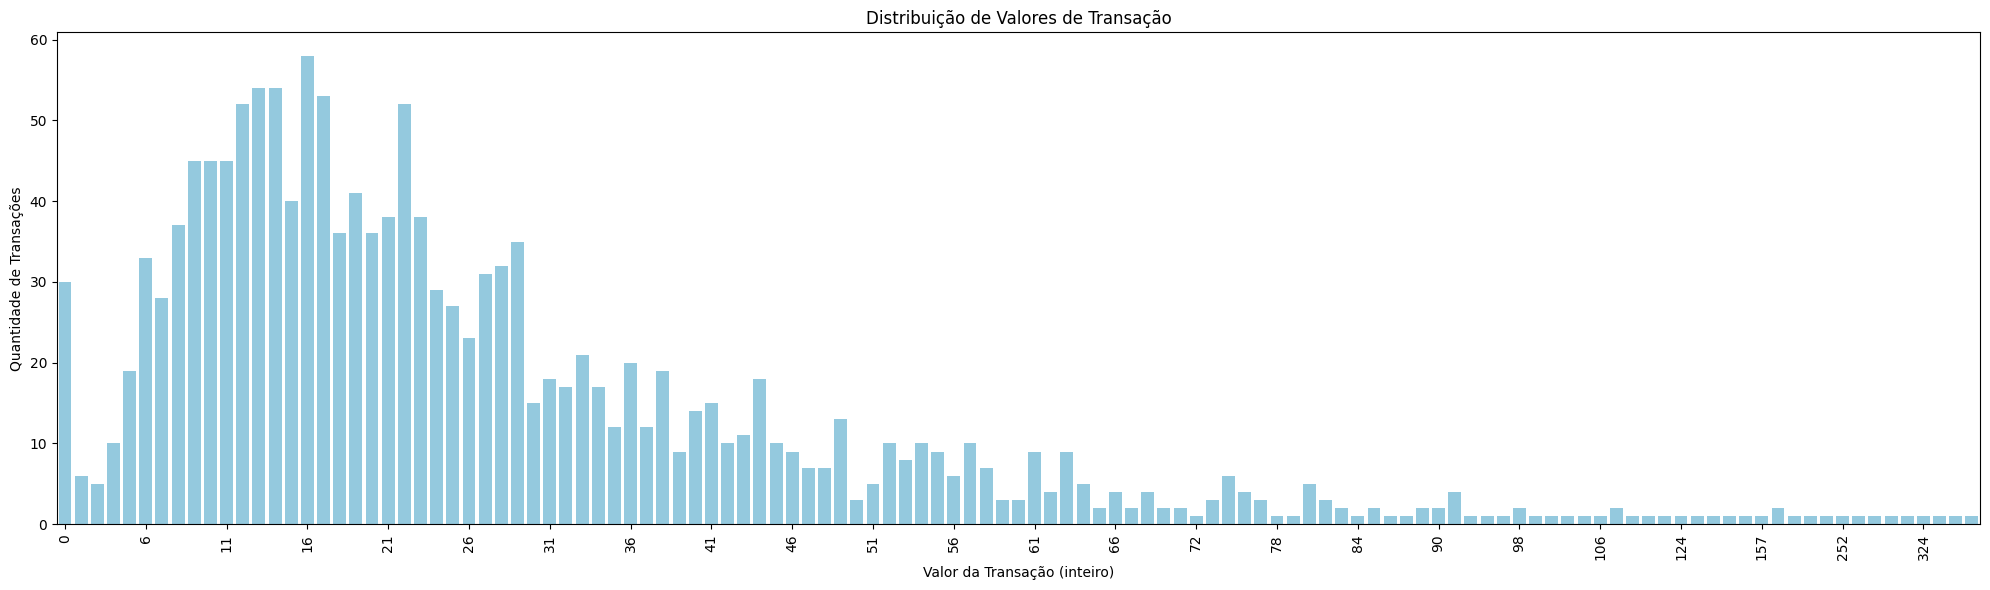

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

pdf = df_bins.groupBy("valor_int").agg(count("*").alias("qtd_transacoes")).orderBy("valor_int").toPandas()

plt.figure(figsize=(20,6))

sns.barplot(data=pdf, x="valor_int", y="qtd_transacoes", color="skyblue")

step = max(1, len(pdf)//20) 
plt.xticks(ticks=range(0, len(pdf), step), labels=pdf['valor_int'][::step], rotation=90)

plt.xlabel("Valor da Transação (inteiro)")
plt.ylabel("Quantidade de Transações")
plt.title("Distribuição de Valores de Transação")

plt.tight_layout()
plt.show()


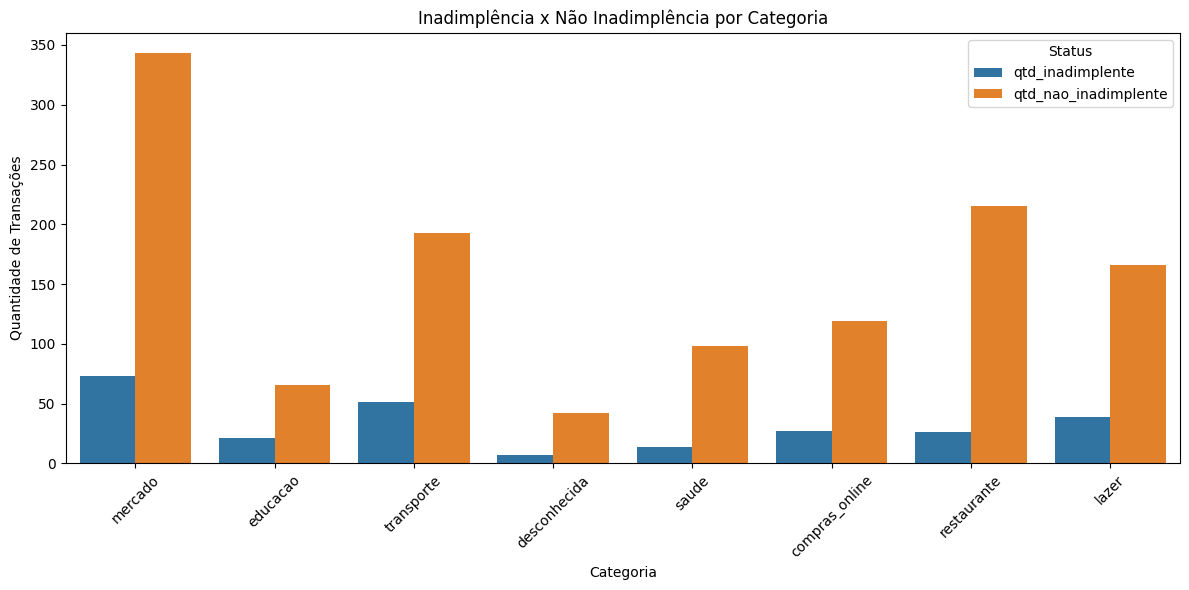

In [0]:
df = spark.table("default.transacoes_clientes")

# Agrupar por categoria e calcular quantidades
df_categoria_qtd = df.groupBy("categoria").agg(
    sum(col("inadimplente")).alias("qtd_inadimplente"),
    (count("*") - sum(col("inadimplente"))).alias("qtd_nao_inadimplente")
)

# Converter para Pandas
pdf_categoria_qtd = df_categoria_qtd.toPandas()

pdf_long = pdf_categoria_qtd.melt(
    id_vars="categoria",
    value_vars=["qtd_inadimplente", "qtd_nao_inadimplente"],
    var_name="Status",
    value_name="Quantidade"
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=pdf_long, x="categoria", y="Quantidade", hue="Status")
plt.ylabel("Quantidade de Transações")
plt.xlabel("Categoria")
plt.title("Inadimplência x Não Inadimplência por Categoria")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#4. Feature Engineering
####-Criar variáveis agregadas por cliente (ex.: total gasto no último mês).
####-Codificar variáveis categóricas (categoria → One Hot Encoding).


In [0]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

df = spark.table("default.transacoes_clientes")

#Total gasto no último mês
max_date = df.agg(F.max("data_transacao")).collect()[0][0]

df_total_mes = (
    df.filter(F.col("data_transacao") >= F.date_sub(F.lit(max_date), 30))
      .groupBy("id_cliente")
      .agg(F.sum("valor_transacao").alias("total_gasto_ultimo_mes"))
)

#Qtd de transações no último mês
df_qtd_mes = (
    df.filter(F.col("data_transacao") >= F.date_sub(F.lit(max_date), 30))
      .groupBy("id_cliente")
      .agg(F.count("*").alias("qtd_transacoes_ultimo_mes"))
)

#Recência (desde a ultima compra)
df_recencia = (
    df.groupBy("id_cliente")
      .agg(F.max("data_transacao").alias("ultima_compra"))
      .withColumn("recencia", F.datediff(F.lit(max_date), F.col("ultima_compra")))
      .drop("ultima_compra")
)

#Ticket Médio
df_ticket = (
    df.groupBy("id_cliente")
      .agg((F.sum("valor_transacao")/F.count("*")).alias("ticket_medio"))
)


#Diversidade de Categorias
df_diversidade = (
    df.groupBy("id_cliente")
      .agg(F.countDistinct("categoria").alias("diversidade_categorias"))
)

df_features = df_total_mes \
    .join(df_qtd_mes, "id_cliente", "left") \
    .join(df_recencia, "id_cliente", "left") \
    .join(df_ticket, "id_cliente", "left") \
    .join(df_diversidade, "id_cliente", "left")

In [0]:
pdf_features = df_features.toPandas()
pdf_features.head()


,id_cliente,total_gasto_ultimo_mes,qtd_transacoes_ultimo_mes,recencia,ticket_medio,diversidade_categorias
0,94,22.280001,1,5,27.537500,3
1,29,28.490000,1,22,37.900001,2
2,284,28.940001,1,19,22.263333,5
3,108,40.290001,2,5,26.081429,6
4,275,52.860001,1,28,23.634286,4


In [0]:
clientes_orig = df.select("id_cliente").distinct().count()
clientes_feat = df_features.select("id_cliente").distinct().count()

print("Clientes no df original:", clientes_orig)
print("Clientes no df_features:", clientes_feat)


Clientes no df original: 297
Clientes no df_features: 81


##One Hot Encoding/Indexing

In [0]:
from pyspark.sql import functions as F

df = spark.table("default.transacoes_clientes")

df_categoria_counts = df.groupBy("id_cliente", "categoria") \
                        .agg(F.count("*").alias("qtd"))

# Pivot p/ o One-Hot Encoding
df_one_hot = df_categoria_counts.groupBy("id_cliente") \
                                .pivot("categoria") \
                                .agg(F.first("qtd")) \
                                .fillna(0)

# Renomear com "cat_"
for col_name in df_one_hot.columns:
    if col_name != "id_cliente":
        df_one_hot = df_one_hot.withColumnRenamed(col_name, "cat_" + col_name)

display(df_one_hot)

id_cliente,cat_compras_online,cat_desconhecida,cat_educacao,cat_lazer,cat_mercado,cat_restaurante,cat_saude,cat_transporte
94,0,0,0,1,2,1,0,0
29,0,0,0,1,0,1,0,0
284,1,1,0,0,1,2,1,0
88,0,0,0,2,2,0,0,0
108,1,0,1,2,1,1,1,0
131,0,0,0,0,1,0,1,1
148,1,1,0,1,2,2,0,0
279,0,0,1,1,2,1,0,0
190,0,0,0,2,1,1,0,0
195,0,0,0,0,2,1,0,0


In [0]:
# Unir com o DataFrame de One-Hot Encoding
df_completo_features = df_features.join(df_one_hot, "id_cliente", "outer")

df_completo_features = df_completo_features.fillna(0)

display(df_completo_features)

# Salvar as features em tabela
(df_completo_features.write
    .format("delta")
    .mode("overwrite")
    .option("overwriteSchema", "true")
    .saveAsTable("default.clientes_features")
)

id_cliente,total_gasto_ultimo_mes,qtd_transacoes_ultimo_mes,recencia,ticket_medio,diversidade_categorias,cat_compras_online,cat_desconhecida,cat_educacao,cat_lazer,cat_mercado,cat_restaurante,cat_saude,cat_transporte
1,0.0,0,0,0.0,0,0,0,1,1,2,0,0,0
2,0.0,0,0,0.0,0,0,0,1,1,1,1,0,1
3,0.0,0,0,0.0,0,0,0,0,3,3,1,0,1
4,0.0,0,0,0.0,0,0,0,0,0,1,1,1,1
5,57.38999938964844,1,20,41.50200004577637,4,1,0,0,1,0,2,0,1
6,0.0,0,0,0.0,0,0,0,1,0,0,0,0,1
7,0.0,0,0,0.0,0,1,0,1,0,1,0,0,2
8,0.0,0,0,0.0,0,2,0,0,2,2,1,1,0
9,0.0,0,0,0.0,0,0,0,1,0,0,0,0,0
10,0.0,0,0,0.0,0,2,0,0,0,1,0,1,0
